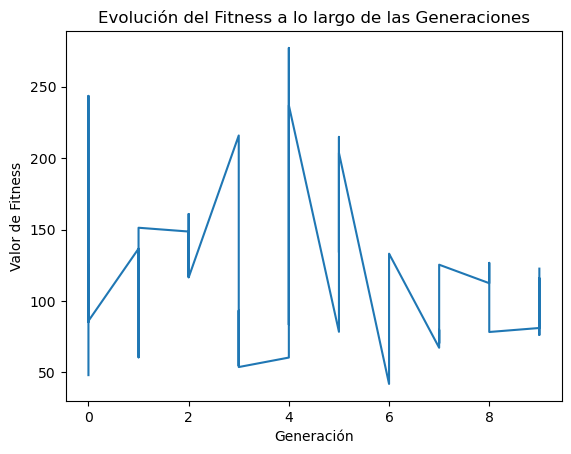

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

path_to_save = "data_1311"
df = pd.read_csv(f"{path_to_save}/data.csv")
df = df.set_index("timestamp")
generations = df['generation']
fitness_values = df['fitness']

plt.plot(generations, fitness_values)
plt.xlabel("Generación")
plt.ylabel("Valor de Fitness")
plt.title("Evolución del Fitness a lo largo de las Generaciones")
plt.show()


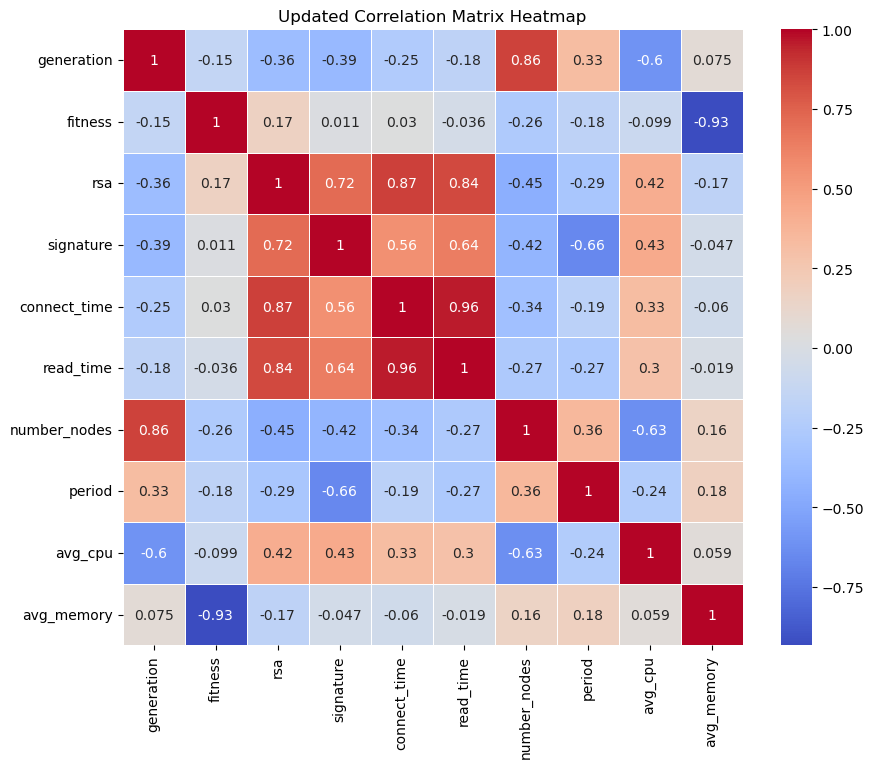

In [3]:
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Convert categorical columns to numerical using LabelEncoder
label_encoder = LabelEncoder()

# Columns to encode
categorical_columns = ['signature']

# Apply LabelEncoder to the categorical columns
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

# Calculate the correlation matrix again
corr_matrix = df.corr()

# Plot the updated correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Updated Correlation Matrix Heatmap")
plt.show()


In [6]:
df

,timestamp,cpu_usage,memory_usage
0,2024-11-14 08:41:29.943298,0.3,345.37500
1,2024-11-14 08:41:30.145817,17.6,-9.21875
2,2024-11-14 08:41:30.349624,0.5,-9.25000
3,2024-11-14 08:41:30.553218,3.2,-9.90625
4,2024-11-14 08:41:30.758355,1.0,-9.93750
...,...,...,...
1596,2024-11-14 08:46:56.782481,1.1,-94.37500
1597,2024-11-14 08:46:56.988487,0.3,-94.37500
1598,2024-11-14 08:46:57.192604,18.2,-94.31250
1599,2024-11-14 08:46:57.399829,0.6,-94.34375


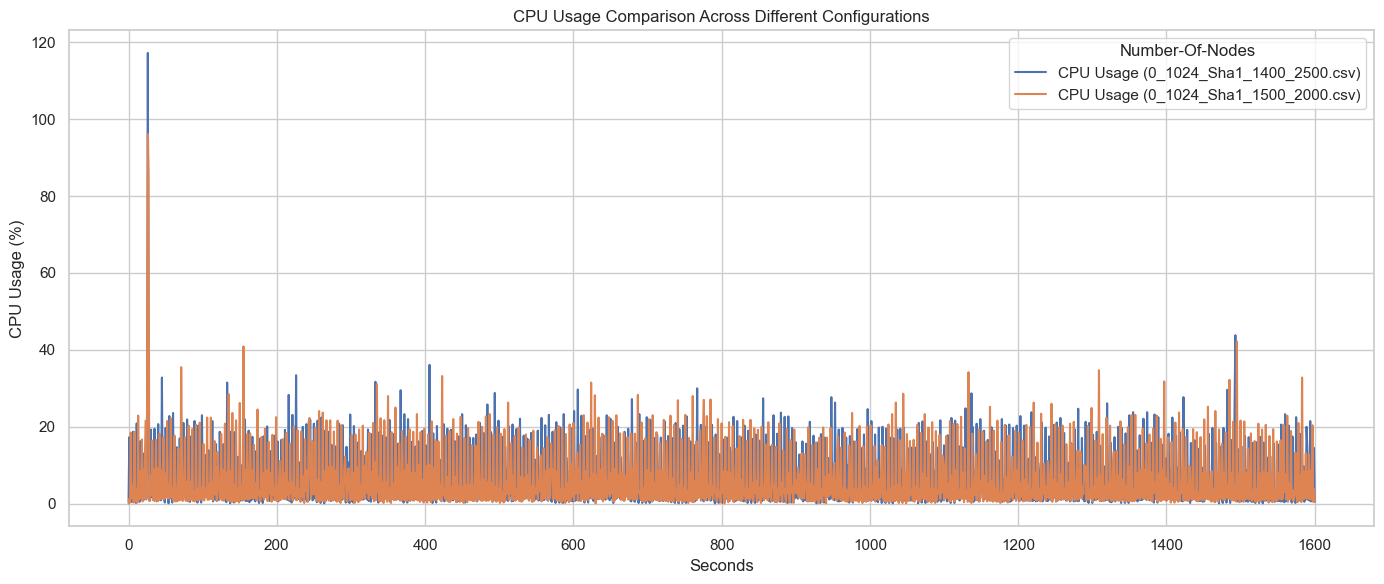

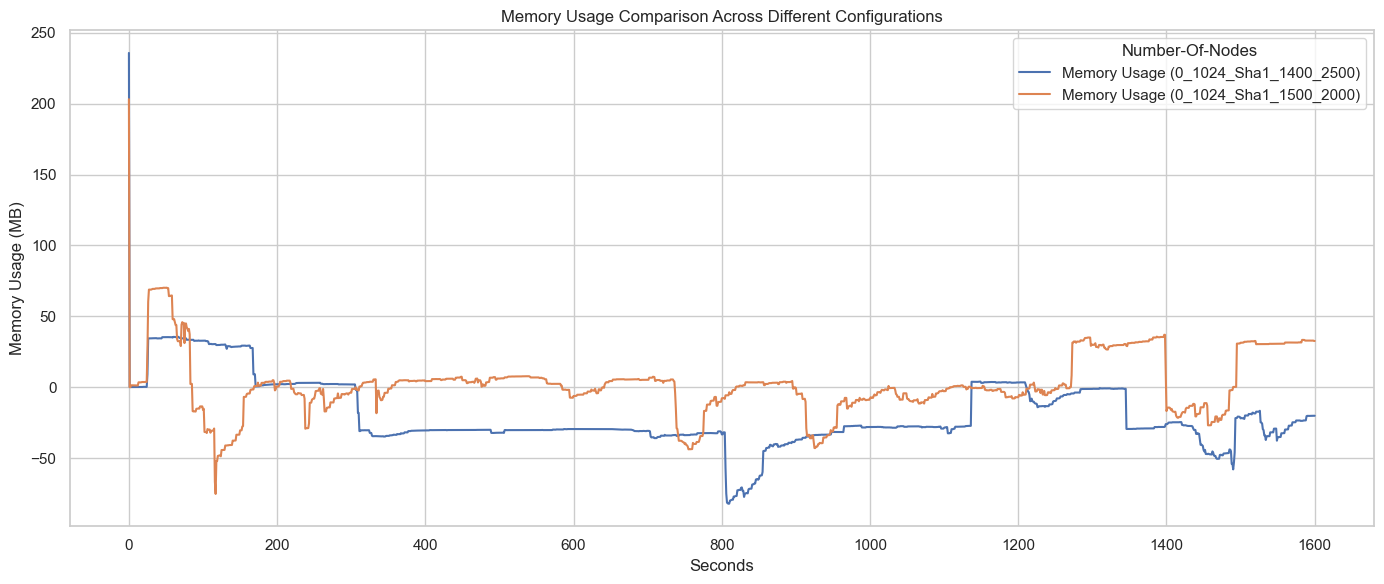

In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

path = "data_1411"
# Cargar los archivos CSV proporcionados
file_paths = [
    f'{path}/0_1024_Sha1_1400_2500.csv',
    f'{path}/0_1024_Sha1_1500_2000.csv',
    # f'{path}/0_1024_Sha384_1_2500.csv',
    # f'{path}/0_1024_Sha384_500_3000.csv'
]

# Leer cada archivo CSV y agregar una columna para identificar la fuente del archivo
frames = []
labels = []
for file in file_paths:
    df_temp = pd.read_csv(file)
    labels.append(file.split('/')[-1])  # Añadir el nombre del archivo como etiqueta
    df_temp.drop(columns=['timestamp'], inplace=True, errors='ignore')  # Eliminar la columna 'timestamp' si existe
    frames.append(df_temp)

# Configurar el estilo de Seaborn
sns.set(style='whitegrid')

# Crear un gráfico de líneas para comparar el uso de CPU a lo largo del tiempo para cada archivo
plt.figure(figsize=(14, 6))
for df_temp, label in zip(frames, labels):
    plt.plot(df_temp.index, df_temp['cpu_usage'], label=f'CPU Usage ({label})')
plt.xlabel('Seconds')
plt.ylabel('CPU Usage (%)')
plt.title('CPU Usage Comparison Across Different Configurations')
plt.legend(title='Number-Of-Nodes')
plt.tight_layout()
plt.show()

# Crear un gráfico de líneas para comparar el uso de memoria a lo largo del tiempo para cada archivo
plt.figure(figsize=(14, 6))
for df_temp, label in zip(frames, labels):
    aux = label.split(".")[0]
    plt.plot(df_temp.index, df_temp['memory_usage'], label=f'Memory Usage ({aux})')
plt.xlabel('Seconds')
plt.ylabel('Memory Usage (MB)')
plt.title('Memory Usage Comparison Across Different Configurations')
plt.legend(title='Number-Of-Nodes')
plt.tight_layout()
plt.show()


# Conclusiones preliminares:
# - Analiza la correlación entre las diferentes variables. Por ejemplo, verifica si hay una fuerte correlación
#   entre el uso de CPU y el ancho de banda enviado o recibido.
# - Observa los picos en el uso de CPU, memoria y ancho de banda, y cómo están relacionados con el índice.
# - Identifica si los picos en el uso de recursos están sincronizados, lo cual podría indicar eventos específicos
#   que causan una mayor carga en el sistema.

In [16]:
import random

import pandas as pd

# Definimos los valores posibles para cada columna
rsa_values = [1024, 2048, 3072, 4096]
signature_values = [0, 1, 2, 3, 4]
number_nodes_values = [500, 1000, 1500, 2000]
period_values = [500, 1000, 1500, 2000, 2500, 3000]

# Generamos 10 filas con valores aleatorios para cada columna
data = []
for _ in range(10):
    row = {
        'RSA': random.choice(rsa_values),
        'Signature': random.choice(signature_values),
        'Number nodes': random.choice(number_nodes_values),
        'Period': random.choice(period_values)
    }
    data.append(row)

# Convertimos la lista de diccionarios en un DataFrame de pandas
df = pd.DataFrame(data)

# Mostramos la tabla generada
(df)

,RSA,Signature,Number nodes,Period
0,3072,0,1500,1000
1,3072,2,1500,500
2,2048,3,2000,1000
3,1024,2,1000,500
4,1024,2,2000,1500
5,1024,3,1000,1500
6,3072,1,500,2500
7,3072,3,1000,1500
8,3072,0,2000,1000
9,3072,1,1500,2000
